In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import json
from datetime import datetime


In [2]:
base_dir = 'G:/My Drive/fog_dataset/'

In [3]:
data_folders = os.listdir(base_dir)
print(f'Number of Folders: {len(data_folders)}')

Number of Folders: 122


In [4]:
subfolder_names = []

for folder in data_folders:
    subfolders = os.listdir(base_dir + folder)
    subfolder_names.append(subfolders) 


flattened_subfolders = [subfolder for sublist in subfolder_names for subfolder in sublist]
subfolder_counts = Counter(flattened_subfolders)

print("Subfolder counts:")
for name, count in subfolder_counts.items():
    print(f"{name}: {count}")

# ND0497 has two subfolders V1, V6

Subfolder counts:
V8: 17
V7: 8
V6: 15
V1: 11
V5: 14
V2: 22
V4: 20
V3: 16


In [5]:
patient_dfs = []

for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file == "Pat_Info.json":
            file_path = os.path.join(root, file)
            
            try:
                df = pd.read_json(file_path, orient='records')
                patient_dfs.append(df)
            except Exception as e:
                print(f"Error reading {file_path}: {e}")

patients_metadata = pd.concat(patient_dfs, ignore_index=True)
patients_metadata

,SubID,Session,Exercise,index,YOB,Gender,Diagnosis,Disease Onset,DBS,LEDD,...,2.13 Freezing,Tremor/PIGD phenotype Tremor Dominant >= 1.15 PIGD < = 0.90 Intermediate >0.90 and < 1.15,Hoehn and Yahr Staging,MOCA,FAQ Score,Mobility score (points),ADL score (points),Total Score (points),Falling,Time to complete 3 meter circuit
0,ND0015,V8,2minWalk,0,1969,M,Parkinson's disease,35.0,Yes,510.0,...,1.0,0.151515,2.0,25.0,6.0,5.0,3.0,31.0,No,44968.0
1,ND0015,V8,4x10mFastWithStop,0,1969,M,Parkinson's disease,35.0,Yes,510.0,...,1.0,0.151515,2.0,25.0,6.0,5.0,3.0,31.0,No,44968.0
2,ND0015,V8,4x10mPrefWithoutStop,0,1969,M,Parkinson's disease,35.0,Yes,510.0,...,1.0,0.151515,2.0,25.0,6.0,5.0,3.0,31.0,No,44968.0
3,ND0015,V8,4x10mSlowWithStop,0,1969,M,Parkinson's disease,35.0,Yes,510.0,...,1.0,0.151515,2.0,25.0,6.0,5.0,3.0,31.0,No,44968.0
4,ND0015,V8,TUG,0,1969,M,Parkinson's disease,35.0,Yes,510.0,...,1.0,0.151515,2.0,25.0,6.0,5.0,3.0,31.0,No,44968.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,ND7142,V2,2minWalk,126,00AM,F,Control,NaN,NaN,NaN,...,0.0,NaN,NaN,27.0,0.0,0.0,0.0,2.0,No,10.0
595,ND7142,V2,4x10mFastWithStop,126,00AM,F,Control,NaN,NaN,NaN,...,0.0,NaN,NaN,27.0,0.0,0.0,0.0,2.0,No,10.0
596,ND7142,V2,4x10mPrefWithoutStop,126,00AM,F,Control,NaN,NaN,NaN,...,0.0,NaN,NaN,27.0,0.0,0.0,0.0,2.0,No,10.0
597,ND7142,V2,4x10mSlowWithStop,126,00AM,F,Control,NaN,NaN,NaN,...,0.0,NaN,NaN,27.0,0.0,0.0,0.0,2.0,No,10.0


In [6]:
patients_metadata.groupby('SubID').Session.nunique().value_counts()
# All patinets except ND0497 have one session folder. 

Session
1    121
2      1
Name: count, dtype: int64

1       1
3       4
4       4
5     112
10      1
Name: count, dtype: int64


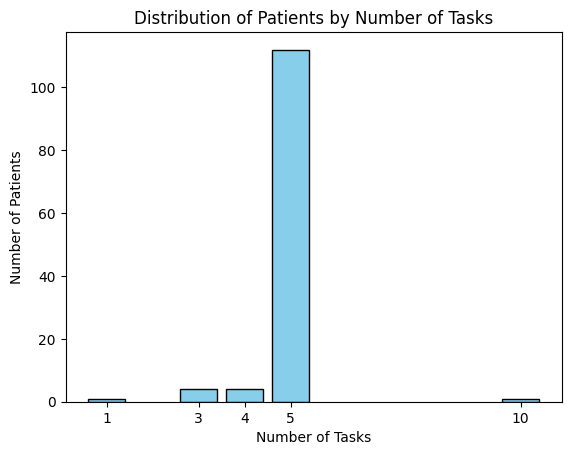

In [7]:
task_counts = patients_metadata.groupby('SubID').size().value_counts().sort_index()
print(task_counts)
plt.bar(task_counts.index, task_counts.values, color='skyblue', edgecolor='black')
plt.title('Distribution of Patients by Number of Tasks')
plt.xlabel('Number of Tasks')
plt.ylabel('Number of Patients')
plt.xticks(task_counts.index) 
plt.show()
# Most of patinets have done 5 exercises. [2minWalk, 4x10mFastWithStop, 4x10mPrefWithoutStop, 4x10mSlowWithStop, TUG: Timed Up and Go Test] 

In [8]:
patients_metadata['YOB'] = pd.to_numeric(patients_metadata['YOB'], errors='coerce') # Convert the 'YOB' column to numeric, replacing non-numeric values with NaN

current_year = datetime.now().year
patients_metadata['Age'] = current_year - patients_metadata['YOB']

In [9]:
unique_patients_metadata = patients_metadata.drop('Exercise', axis=1)
unique_patients_metadata = unique_patients_metadata.drop_duplicates(ignore_index=True)
unique_patients_metadata

,SubID,Session,index,YOB,Gender,Diagnosis,Disease Onset,DBS,LEDD,Minutes since the last levodopa dose,...,Tremor/PIGD phenotype Tremor Dominant >= 1.15 PIGD < = 0.90 Intermediate >0.90 and < 1.15,Hoehn and Yahr Staging,MOCA,FAQ Score,Mobility score (points),ADL score (points),Total Score (points),Falling,Time to complete 3 meter circuit,Age
0,ND0015,V8,0,1969.0,M,Parkinson's disease,35.0,Yes,510.00,240.0,...,0.151515,2.0,25.0,6.0,5.0,3.0,31.0,No,44968.00,56.0
1,ND0026,V8,1,1947.0,M,Parkinson's disease,66.0,No,400.01,NaN,...,0.681818,2.0,27.0,0.0,8.0,6.0,31.0,No,13.00,78.0
2,ND0027,V8,2,1950.0,F,Parkinson's disease,57.0,No,834.28,NaN,...,0.000000,3.0,24.0,12.0,11.0,9.0,32.0,No,31.00,75.0
3,ND0028,V8,3,1943.0,M,Parkinson's disease,52.0,No,200.00,540.0,...,2.272727,2.0,27.0,0.0,0.0,1.0,8.0,NaN,13.52,82.0
4,ND0045,V8,5,1943.0,M,Parkinson's disease and dementia,68.0,No,1318.75,210.0,...,1.727273,2.5,11.0,23.0,15.0,16.0,62.0,No,NaN,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,ND3706,V1,121,1941.0,M,Control,NaN,No,NaN,NaN,...,NaN,0.0,24.0,0.0,0.0,0.0,6.0,No,NaN,84.0
119,ND3711,V1,122,1957.0,M,Control,NaN,No,NaN,NaN,...,NaN,0.0,29.0,NaN,NaN,NaN,NaN,NaN,16650.00,68.0
120,ND7029,V7,123,1949.0,M,Parkinson's disease,64.0,No,774.00,200.0,...,1.363636,2.0,26.0,11.0,1.0,1.0,10.0,No,10.00,76.0
121,ND7064,V6,124,1953.0,M,Parkinson's disease,53.0,No,442.86,150.0,...,0.649351,2.5,28.0,1.0,2.0,2.0,15.0,No,NaN,72.0


In [10]:
unique_patients_metadata.isna().sum()

SubID                                                                                               0
Session                                                                                             0
index                                                                                               0
YOB                                                                                                 3
Gender                                                                                              0
Diagnosis                                                                                           0
Disease Onset                                                                                      21
DBS                                                                                                27
LEDD                                                                                               35
Minutes since the last levodopa dose                                              

In [11]:
print(unique_patients_metadata.Gender.value_counts())
print('-----------------------------------')
print(round(unique_patients_metadata.Gender.value_counts()/len(unique_patients_metadata)*100, 2))
# 67.5% of patients are Male and the rest 32.5% are Female. 

Gender
M    83
F    40
Name: count, dtype: int64
-----------------------------------
Gender
M    67.48
F    32.52
Name: count, dtype: float64


In [12]:
unique_patients_metadata.Diagnosis.value_counts()
# Parkinsonism unspecified: Patients exhibiting symptoms of parkinsonism, but without a specific diagnosis being determined.
# Progressive supranuclear palsy: A rare neurological condition often mistaken for Parkinson’s, characterized by issues with movement, balance, and eye movements.
# Secondary parkinsonism: other : Parkinsonism caused by an identifiable cause (e.g., drugs, toxins, or head trauma) other than primary Parkinson’s disease.
# Lewy body dementia: A condition involving dementia linked to abnormal protein deposits in the brain (Lewy bodies), often overlapping with Parkinson’s disease symptoms.
# Multiple system atrophy-P: A subtype of Multiple System Atrophy primarily affecting movement and autonomic functions, mimicking Parkinson’s disease symptoms.

Diagnosis
Parkinson's disease                 93
Control                             18
Parkinson's disease and dementia     5
Progressive supranuclear palsy       2
Parkinsonism unspecified             2
Secondary parkinsonism: other        1
Lewy body dementia                   1
Multiple system atrophy-P            1
Name: count, dtype: int64

In [13]:
round(unique_patients_metadata.Diagnosis.value_counts()/len(unique_patients_metadata)*100, 2)

Diagnosis
Parkinson's disease                 75.61
Control                             14.63
Parkinson's disease and dementia     4.07
Progressive supranuclear palsy       1.63
Parkinsonism unspecified             1.63
Secondary parkinsonism: other        0.81
Lewy body dementia                   0.81
Multiple system atrophy-P            0.81
Name: count, dtype: float64

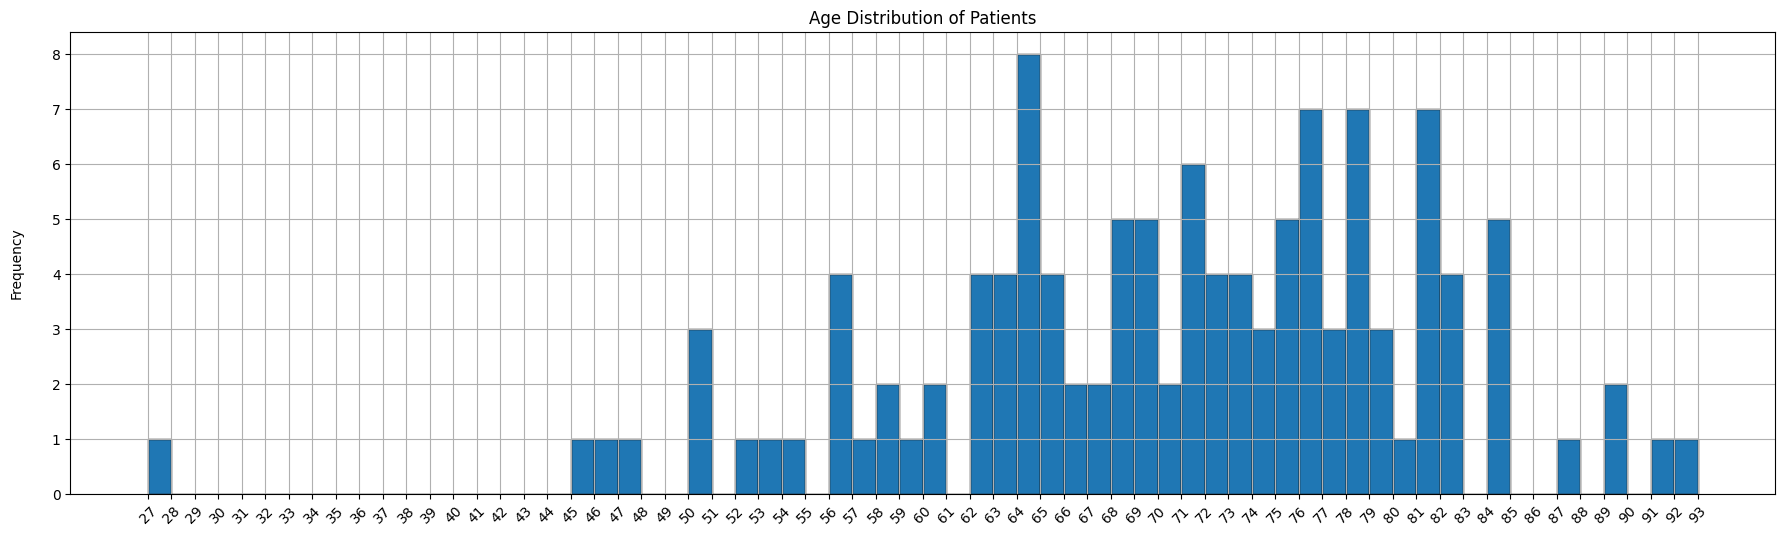

In [14]:
plt.figure(figsize=(22, 6))
plt.hist(unique_patients_metadata['Age'].dropna(), bins=range(int(unique_patients_metadata['Age'].min()), int(unique_patients_metadata['Age'].max()) + 1, 1), edgecolor='black')
plt.title('Age Distribution of Patients')
plt.xlabel('')
plt.ylabel('Frequency', labelpad=20)
plt.xticks(range(int(unique_patients_metadata['Age'].min()), int(unique_patients_metadata['Age'].max()) + 1, 1), rotation=45)
plt.grid(True)
plt.show()



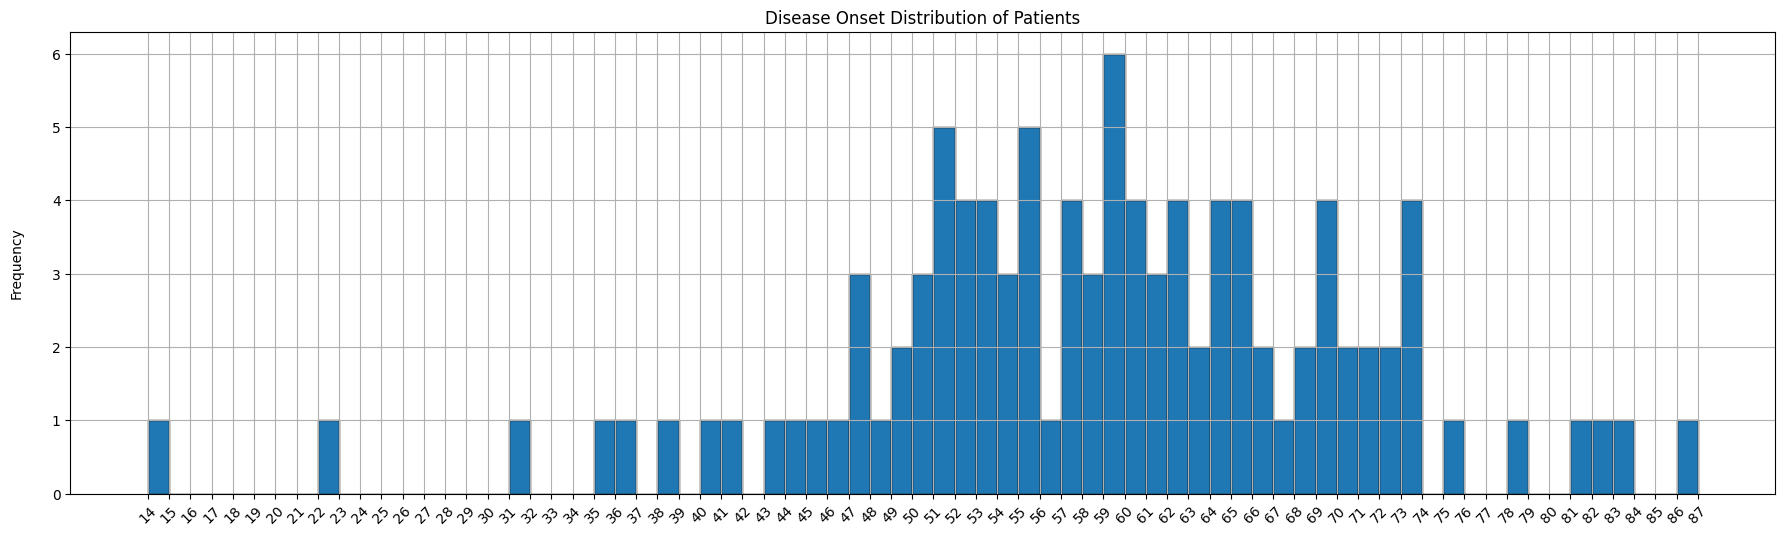

In [15]:
# Disease Onset could indicate the age at which a patient started showing symptoms 
plt.figure(figsize=(22, 6))
plt.hist(unique_patients_metadata['Disease Onset'].dropna(), bins=range(int(unique_patients_metadata['Disease Onset'].min()), int(unique_patients_metadata['Disease Onset'].max()) + 1, 1), edgecolor='black')
plt.title('Disease Onset Distribution of Patients')
plt.xlabel('')
plt.ylabel('Frequency', labelpad=20)
plt.xticks(range(int(unique_patients_metadata['Disease Onset'].min()), int(unique_patients_metadata['Disease Onset'].max()) + 1, 1), rotation=45)
plt.grid(True)
plt.show()


In [16]:
# DBS: Deep Brain Stimulation: is a surgical procedure that implants
# a neurostimulator and electrodes which sends electrical impulses 
# to specified targets in the brain responsible for movement control
unique_patients_metadata.DBS.value_counts(dropna=False)

DBS
No     94
NaN    27
Yes     2
Name: count, dtype: int64

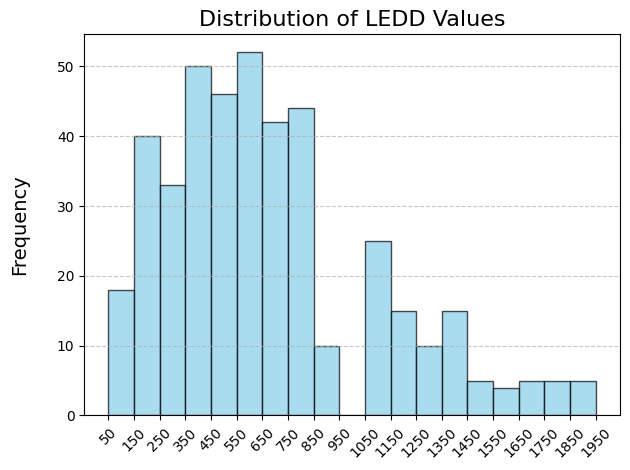

In [17]:
# LEDD: Levodopa Equivalent Daily Dose. It is a measure used in the treatment of Parkinson's disease 
# to quantify the total daily dose of all dopaminergic medications a patient is taking, converted into
# an equivalent dose of levodopa.

valid_LEDD = patients_metadata['LEDD'].dropna()

bins = np.arange(50, 2001, 100)

n, bin_edges, patches = plt.hist(valid_LEDD, bins=bins, color='skyblue', edgecolor='black', alpha=0.7)

plt.xticks(bin_edges, rotation=45, fontsize=10)

plt.title('Distribution of LEDD Values', fontsize=16)
plt.xlabel('')
plt.ylabel('Frequency', fontsize=14, labelpad=20)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  
plt.show()

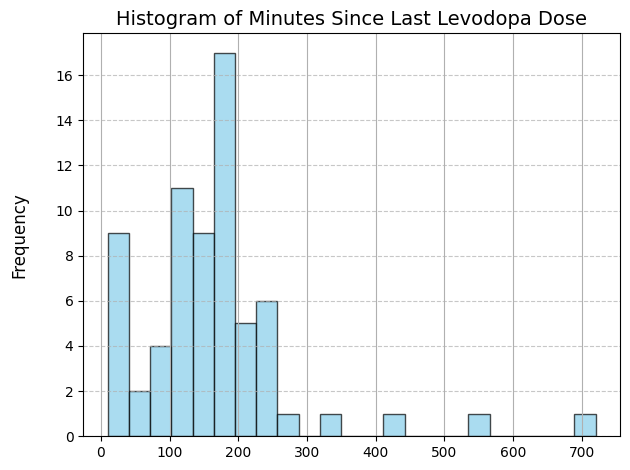

In [18]:
unique_patients_metadata['Minutes since the last levodopa dose'].hist(
    bins='auto', color='skyblue', edgecolor='black', alpha=0.7
)
plt.title('Histogram of Minutes Since Last Levodopa Dose', fontsize=14)
plt.xlabel('')
plt.ylabel('Frequency', fontsize=12, labelpad=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

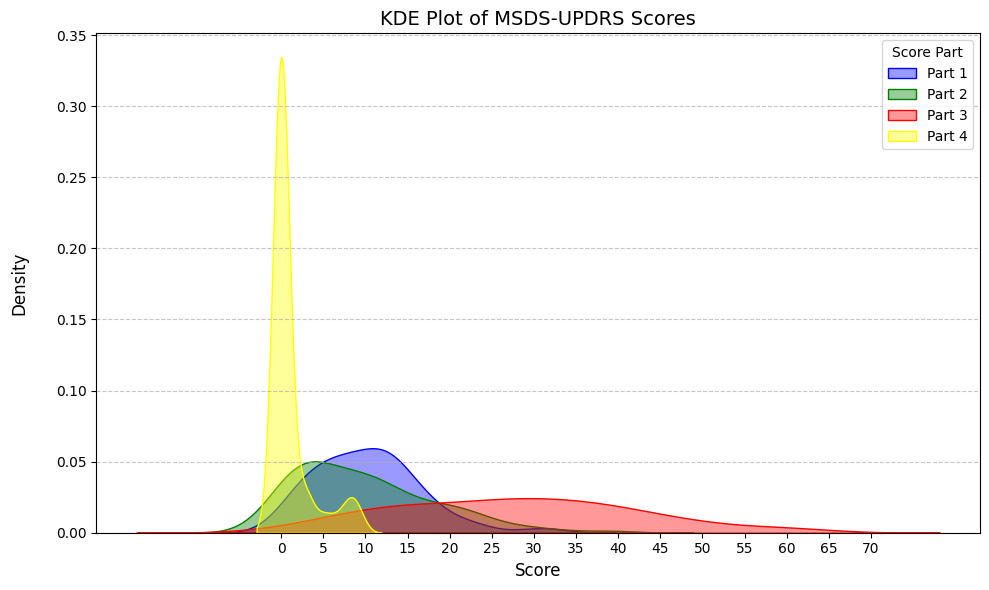

In [19]:
# The MDS-UPDRS (Movement Disorder Society Unified Parkinson's Disease Rating Scale) is a commonly used assessment tool to evaluate the severity of Parkinson's disease symptoms across multiple domains.
# MDS-UPDRS Part 1: Non-Motor Experiences of Daily Living (NMS). It covers how Parkinson's affects daily life beyond motor symptoms, including mood, behavior, cognitive function, sleep, and autonomic symptoms.
# MDS-UPDRS Part 2: Motor Experiences of Daily Living (MOTOR). It evaluates the impact of motor dysfunction on tasks such as dressing, eating, walking, and hygiene.
# MDS-UPDRS Part 3: Motor Examination. It evaluates specific motor features of Parkinson's, including rigidity, bradykinesia, tremor, and postural instability.
# MDS-UPDRS Part 4: Motor Complications. It assesses motor complications resulting from Parkinson's disease treatment, particularly focusing on the side effects of long-term use of dopaminergic medications, such as levodopa.

plt.figure(figsize=(10, 6))
sns.kdeplot(unique_patients_metadata['MSDS-UPDRS part 1'], label='Part 1', fill=True, alpha=0.4, color='blue') # data_min:0.0, data_max:32.0
sns.kdeplot(unique_patients_metadata['MSDS-UPDRS part 2'], label='Part 2', fill=True, alpha=0.4, color='green') # data_min: 0.0, data_max:39.0
sns.kdeplot(unique_patients_metadata['MSDS-UPDRS part 3'], label='Part 3', fill=True, alpha=0.4, color='red') # data_min: 0.0, data_max: 61.0
sns.kdeplot(unique_patients_metadata['MSDS-UPDRS part 4'], label='Part 4', fill=True, alpha=0.4, color='yellow') # data_min: 0.0, data_max: 9.0

plt.title('KDE Plot of MSDS-UPDRS Scores', fontsize=14)
plt.xlabel('Score', fontsize=12)
plt.ylabel('Density', fontsize=12, labelpad=20)
min_value = min(
    unique_patients_metadata['MSDS-UPDRS part 1'].min(),
    unique_patients_metadata['MSDS-UPDRS part 2'].min(),
    unique_patients_metadata['MSDS-UPDRS part 3'].min(),
    unique_patients_metadata['MSDS-UPDRS part 4'].min()

)
max_value = max(
    unique_patients_metadata['MSDS-UPDRS part 1'].max(),
    unique_patients_metadata['MSDS-UPDRS part 2'].max(),
    unique_patients_metadata['MSDS-UPDRS part 3'].max(),
    unique_patients_metadata['MSDS-UPDRS part 4'].max()

)

plt.xticks(np.arange(min_value, max_value + 10, 5))

plt.legend(title='Score Part', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [20]:
unique_patients_metadata.columns

Index(['SubID', 'Session', 'index', 'YOB', 'Gender', 'Diagnosis',
       'Disease Onset', 'DBS', 'LEDD', 'Minutes since the last levodopa dose',
       'MSDS-UPDRS part 3', 'MSDS-UPDRS part 1', 'MSDS-UPDRS part 2',
       '3.3.4 Rigidity of RIGHT LOWER EXTREMITY',
       '3.3.5 Rigidity of LEFT LOWER EXTREMITY', '3.10 Gait',
       '3.11 Freezing of gait', '3.12 Postural stability', 'MSDS-UPDRS part 4',
       '2.12 Walking and balance', '2.13 Freezing',
       'Tremor/PIGD phenotype    Tremor Dominant >= 1.15  PIGD < = 0.90   Intermediate >0.90 and < 1.15',
       'Hoehn and Yahr Staging', 'MOCA', 'FAQ Score',
       'Mobility score (points)', 'ADL score (points)', 'Total Score (points)',
       'Falling', 'Time to complete 3 meter circuit', 'Age'],
      dtype='object')

In [21]:
# Severity Ratings (0, 1, 2, 3):
# 0: No rigidity observed, 1: Mild rigidity, 2: Moderate rigidity, 3: Severe rigidity 

unique_patients_metadata['3.3.4 Rigidity of RIGHT LOWER EXTREMITY'].value_counts(dropna=False) 

3.3.4 Rigidity of RIGHT LOWER EXTREMITY
0.0    51
1.0    29
NaN    24
2.0    15
3.0     4
Name: count, dtype: int64

In [22]:
unique_patients_metadata['3.3.5 Rigidity of LEFT LOWER EXTREMITY'].value_counts(dropna=False)

3.3.5 Rigidity of LEFT LOWER EXTREMITY
0.0    54
1.0    26
NaN    24
2.0    16
3.0     3
Name: count, dtype: int64

In [23]:
unique_patients_metadata['3.10 Gait'].value_counts(dropna=False)

3.10 Gait
1.0    41
0.0    37
NaN    24
2.0    16
3.0     4
4.0     1
Name: count, dtype: int64

In [24]:
unique_patients_metadata['3.11 Freezing of gait'].value_counts(dropna=False)

3.11 Freezing of gait
0.0    84
NaN    24
1.0    12
4.0     2
2.0     1
Name: count, dtype: int64

In [25]:
unique_patients_metadata['3.12 Postural stability'].value_counts(dropna=False)

3.12 Postural stability
0.0    71
NaN    24
1.0    16
3.0     7
2.0     4
4.0     1
Name: count, dtype: int64

In [26]:
unique_patients_metadata['2.12 Walking and balance'].value_counts(dropna=False)

2.12 Walking and balance
0.0    50
1.0    29
NaN    26
3.0     9
2.0     8
4.0     1
Name: count, dtype: int64

In [27]:
unique_patients_metadata['2.13 Freezing'].value_counts(dropna=False)

2.13 Freezing
0.0    60
NaN    26
1.0    20
2.0     9
3.0     7
4.0     1
Name: count, dtype: int64

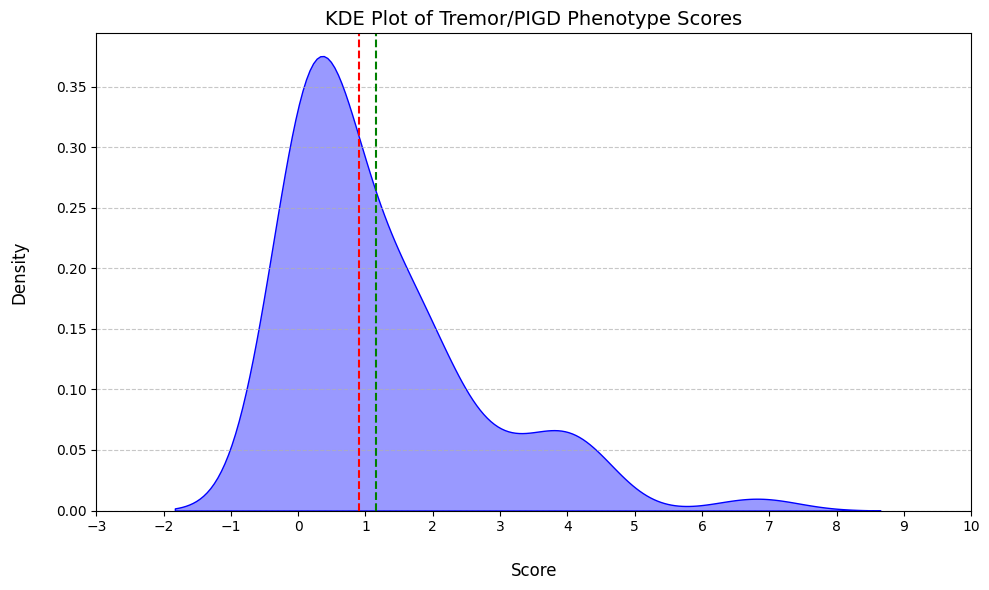

In [28]:
# The Tremor/PIGD phenotype classification divides Parkinson’s disease patients into categories based on the severity of tremor and postural instability/gait difficulty:
# Tremor Dominant: Primarily tremors, with mild or no postural instability/gait issues.
# PIGD (Postural Instability and Gait Difficulty): Significant balance and gait issues, with mild or no tremors.
# Intermediate: Moderate severity of both tremor and PIGD symptoms.

df = unique_patients_metadata['Tremor/PIGD phenotype    Tremor Dominant >= 1.15  PIGD < = 0.90   Intermediate >0.90 and < 1.15']

# Replace inf values (both +inf and -inf) with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

df.dropna(inplace=True)
df = df[df <= 10]

# KDE Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df, fill=True, alpha=0.4, color='blue')

plt.axvline(x=0.90, color='red', linestyle='--')
plt.axvline(x=1.15, color='green', linestyle='--')

plt.title('KDE Plot of Tremor/PIGD Phenotype Scores', fontsize=14)
plt.xlabel('Score', fontsize=12, labelpad=20)
plt.xticks(np.arange(min(df)-3, max(df)+4, 1))

plt.xticks()
plt.ylabel('Density', fontsize=12, labelpad=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [29]:
unique_patients_metadata.iloc[0]

SubID                                                                                                           ND0015
Session                                                                                                             V8
index                                                                                                                0
YOB                                                                                                             1969.0
Gender                                                                                                               M
Diagnosis                                                                                          Parkinson's disease
Disease Onset                                                                                                     35.0
DBS                                                                                                                Yes
LEDD                                            

In [30]:
# The Hoehn and Yahr Stage is a clinical scale used to assess the severity of Parkinson's Disease (PD) based on the progression of motor symptoms.
unique_patients_metadata['Hoehn and Yahr Staging'].value_counts(dropna=False).sort_index()

Hoehn and Yahr Staging
0.0     5
1.0    17
1.5     7
2.0    45
2.5    13
3.0     8
4.0     4
NaN    24
Name: count, dtype: int64

MOCA
9.0      1
11.0     1
18.0     5
19.0     4
20.0     7
21.0     2
22.0     4
23.0     5
24.0     4
25.0    17
26.0    19
27.0    12
28.0    12
29.0     4
30.0     5
Name: count, dtype: int64


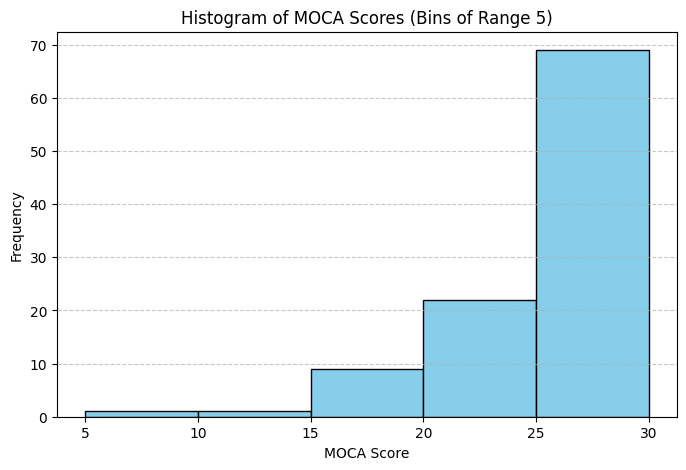

In [31]:
# MoCA: Montreal Cognitive Assessment. The total possible score is 30 points; a score of 26 or above is considered normal
print(unique_patients_metadata['MOCA'].value_counts().sort_index())
plt.figure(figsize=(8, 5))
plt.hist(unique_patients_metadata['MOCA'].dropna(), bins=range(5, 35, 5), edgecolor='black', color='skyblue')
plt.title("Histogram of MOCA Scores (Bins of Range 5)")
plt.xlabel("MOCA Score")
plt.ylabel("Frequency")
plt.xticks(range(5, 35, 5))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [32]:
# Functional Activities Questionnaire (FAQ)
unique_patients_metadata['FAQ Score'].value_counts(dropna=False).sort_index()

FAQ Score
0.0     48
1.0     11
2.0      4
3.0      3
4.0      1
5.0      2
6.0      3
7.0      3
8.0      2
9.0      1
10.0     2
11.0     2
12.0     1
15.0     1
16.0     1
19.0     1
20.0     1
23.0     1
29.0     1
30.0     2
NaN     32
Name: count, dtype: int64

In [33]:
unique_patients_metadata['Mobility score (points)'].value_counts(dropna=False).sort_index()

Mobility score (points)
0.0     22
1.0      6
2.0      9
3.0      6
4.0      6
5.0      3
6.0      4
7.0      3
8.0      4
9.0      4
10.0     1
11.0     4
13.0     3
14.0     1
15.0     3
17.0     2
18.0     2
20.0     1
21.0     1
22.0     1
23.0     3
24.0     1
25.0     2
27.0     1
28.0     2
29.0     1
39.0     1
NaN     26
Name: count, dtype: int64

In [34]:
# ADL: Activities of Daily Living
unique_patients_metadata['ADL score (points)'].value_counts(dropna=False).sort_index()

ADL score (points)
0.0     16
1.0      9
2.0     13
3.0     11
4.0      7
5.0      7
6.0      6
7.0      6
8.0      5
9.0      6
10.0     1
11.0     3
13.0     1
14.0     2
15.0     1
16.0     1
22.0     2
NaN     26
Name: count, dtype: int64

In [35]:
unique_patients_metadata['Total Score (points)'].value_counts(dropna=False).sort_index()

Total Score (points)
0.0       1
1.0       2
2.0       2
3.0       3
4.0       1
5.0       2
6.0       1
8.0       1
9.0       1
10.0      6
11.0      2
12.0      1
13.0      1
14.0      3
15.0      2
16.0      3
17.0      4
18.0      1
19.0      2
20.0      2
21.0      1
22.0      1
23.0      1
24.0      4
25.0      2
27.0      1
28.0      4
29.0      2
31.0      3
32.0      1
35.0      2
36.0      2
37.0      2
38.0      1
39.0      2
40.0      1
43.0      1
45.0      1
51.0      1
52.0      1
53.0      1
54.0      1
56.0      3
58.0      1
59.0      1
60.0      1
62.0      1
68.0      2
70.0      1
72.0      1
78.0      2
81.0      1
84.0      1
85.0      1
114.0     1
124.0     1
NaN      28
Name: count, dtype: int64

In [36]:
unique_patients_metadata.Falling.value_counts(dropna=False)

Falling
No     78
NaN    27
Yes    18
Name: count, dtype: int64

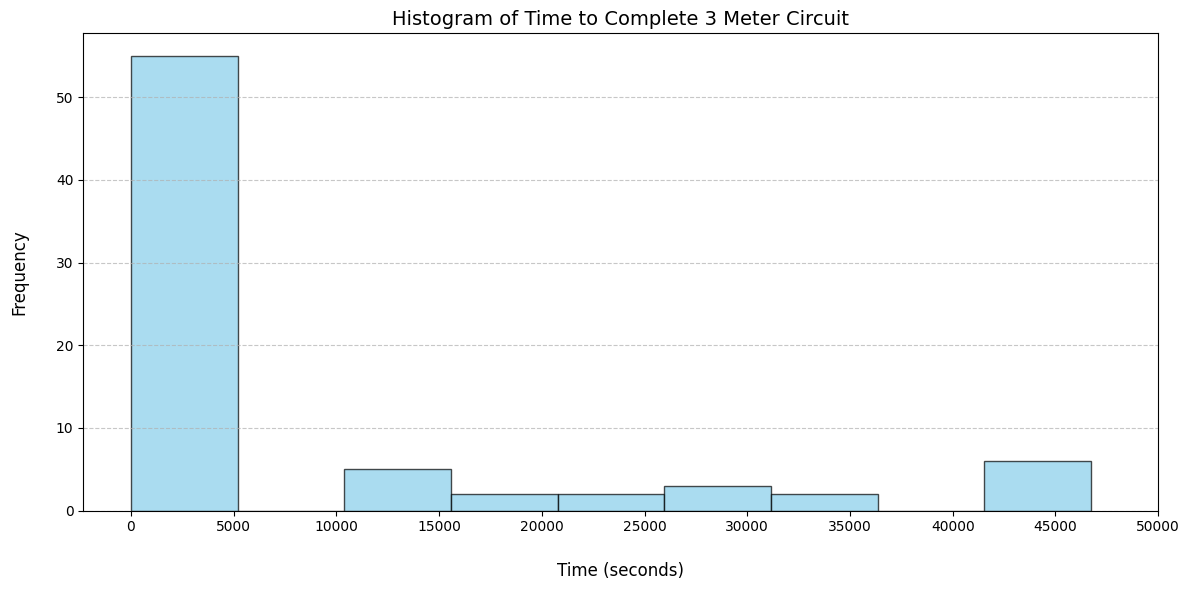

In [37]:
plt.figure(figsize=(12, 6))
counts, bin_edges, _ = plt.hist(
    unique_patients_metadata['Time to complete 3 meter circuit'],
    bins='auto', color='skyblue', edgecolor='black', alpha=0.7
)

plt.title('Histogram of Time to Complete 3 Meter Circuit', fontsize=14)
plt.xlabel('Time (seconds)', fontsize=12, labelpad=20)
plt.ylabel('Frequency', fontsize=12, labelpad=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)

max_value = unique_patients_metadata['Time to complete 3 meter circuit'].max()
x_ticks = np.arange(0, max_value + 5000, 5000)
plt.xticks(x_ticks, fontsize=10)

plt.tight_layout()
plt.show()
